## Лабораторная работа № 2. Контурный анализ

1.	Для изображения примените: 
-	оператор Собеля cv2.Sobel()
-	оператор Лапласа cv2.Laplacian()
-	детектор границ Кэнни cv2.Canny(). Подберите параметры детектора таким образом, чтобы получить почти идеальное изображение.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\vladk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


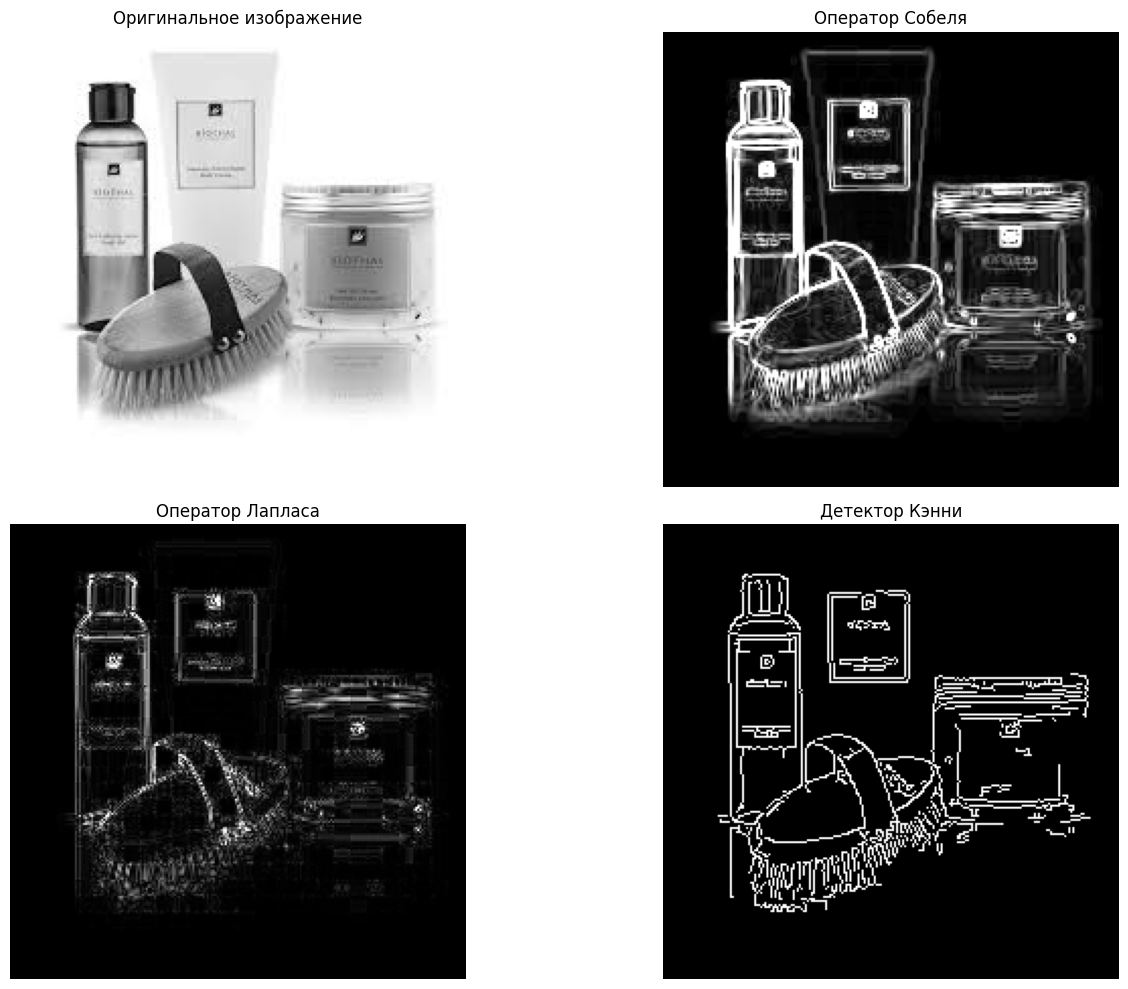

In [ ]:
%pip install opencv-python numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'white.jpg' 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Читаем в градациях серого

# Проверка, загрузилось ли изображение
if image is None:
    print("Ошибка: изображение не найдено. Проверьте путь к файлу.")
else:
    # 1. Оператор Собеля
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Градиент по X
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Градиент по Y
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Комбинированный градиент
    sobel_combined = cv2.convertScaleAbs(sobel_combined)  # Преобразование в uint8

    # 2. Оператор Лапласа
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)  # Преобразование в uint8

    # 3. Детектор границ Кэнни
    # Подбор параметров: нижний порог = 100, верхний порог = 200 для хорошего выделения границ
    canny = cv2.Canny(image, threshold1=100, threshold2=200)

    # Визуализация результатов
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.title('Оригинальное изображение')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Оператор Собеля')
    plt.imshow(sobel_combined, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Оператор Лапласа')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Детектор Кэнни')
    plt.imshow(canny, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

2.	Для этого задания нужно изображение нескольких предметов на однородном фоне.
-	Найдите все контуры на изображении используя функцию поиска контуров cv2.findContours();
-	Найдите только внешние контуры;
-	Нарисуйте прямоугольники, в которые вписаны предметы на изображении;
-	Выведите количество предметов;
-	Выделите контуры с наибольшей длиной и наибольшей площадью.

Количество предметов: 11


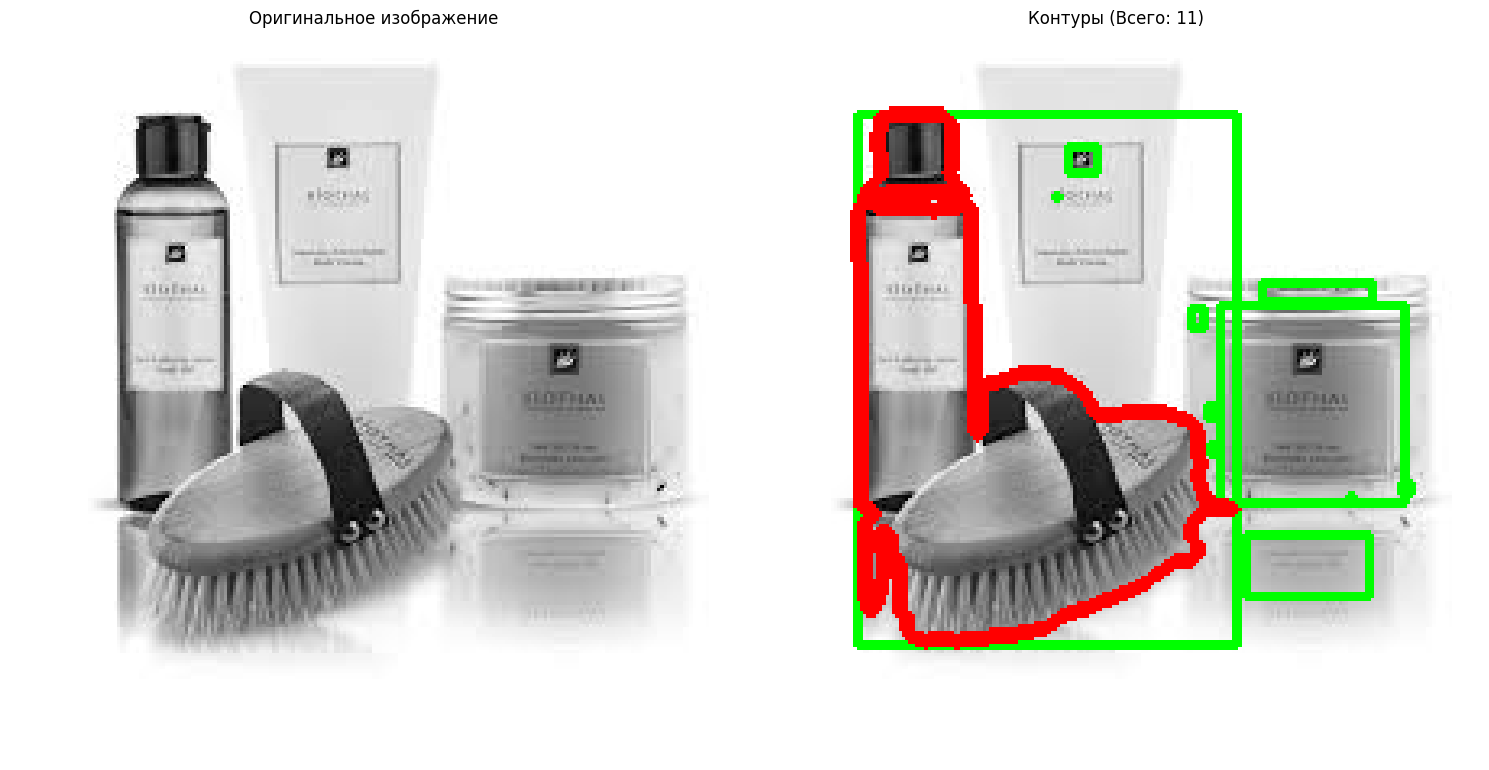

Длина наибольшего контура: 664.63
Площадь наибольшего контура: 9350.50


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'white.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Читаем в градациях серого

# Проверка, загрузилось ли изображение
if image is None:
    print("Ошибка: изображение не найдено. Проверьте путь к файлу.")
else:
    # Предобработка: размытие для уменьшения шума
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Применение пороговой обработки для выделения предметов
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Поиск всех контуров
    #RETR_LIST Все контуры без иерархии
    #RETR_TREE Все контуры всех уровней (иерархия)
    #RETR_EXTERNAL Только внешние контуры
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Подсчет количества предметов
    num_objects = len(contours)
    print(f"Количество предметов: {num_objects}")
    
    # Копия изображения для рисования
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Проверка, есть ли контуры
    if contours:
        # Поиск контуров с наибольшей длиной и площадью
        max_length_contour = max(contours, key=lambda c: cv2.arcLength(c, closed=True))
        max_area_contour = max(contours, key=cv2.contourArea)
    
        # Рисование прямоугольников и выделение особых контуров
        for contour in contours:
            # Находим ограничивающий прямоугольник
            x, y, w, h = cv2.boundingRect(contour)
            # Рисуем прямоугольник (зеленый цвет)
            cv2.rectangle(image_color, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            # Выделяем контур с наибольшей длиной (синий цвет)
            if contour is max_length_contour:
                cv2.drawContours(image_color, [contour], -1, (255, 0, 0), 3)
            # Выделяем контур с наибольшей площадью (красный цвет)
            if contour is max_area_contour:
                cv2.drawContours(image_color, [contour], -1, (0, 0, 255), 3)
    
        # Визуализация результатов
        plt.figure(figsize=(15, 10))
        
        plt.subplot(1, 2, 1)
        plt.title('Оригинальное изображение')
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title(f'Контуры (Всего: {num_objects})')
        plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Вывод информации о контурах
        print(f"Длина наибольшего контура: {cv2.arcLength(max_length_contour, closed=True):.2f}")
        print(f"Площадь наибольшего контура: {cv2.contourArea(max_area_contour):.2f}")
    else:
        print("Контуры не найдены. Проверьте качество изображения или параметры пороговой обработки.")

3.	Для этого задания нужны изображения с прямыми линиями (например, дорожная разметка, здания…) и изображения с круглыми предметами (например, торцы сложенных бревен, россыпь монет на столе…)
	На изображении с прямолинейными объектами найдите линии cv2.HoughLines(), а на изображении с окружностями найдите окружности методом cv2.HoughCircles(). Выведите количество окружностей.


Количество найденных окружностей: 104


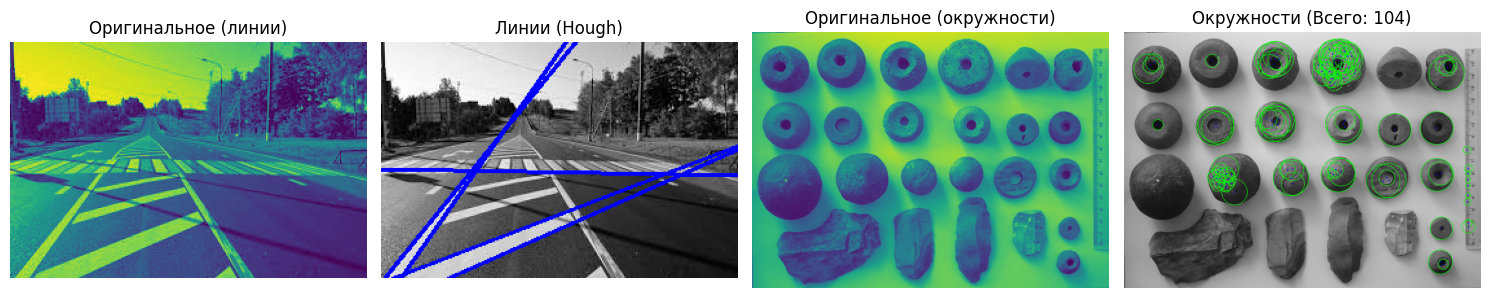

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для отображения изображений
def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.title(title)
        plt.imshow(img, cmap=cmap)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# --- Обработка изображения с прямыми линиями ---
lines_image_path = 'direct.jpg' 
lines_image = cv2.imread(lines_image_path, cv2.IMREAD_GRAYSCALE)

# Проверка, загрузилось ли изображение
if lines_image is None:
    print("Ошибка: изображение с линиями не найдено. Проверьте путь к файлу.")
else:
    # Предобработка: размытие и детектор Кэнни
    blurred_lines = cv2.GaussianBlur(lines_image, (5, 5), 0)
    edges = cv2.Canny(blurred_lines, 50, 150, apertureSize=3)
    
    # Обнаружение линий с помощью HoughLines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)
    
    # Копия изображения для рисования линий
    lines_image_color = cv2.cvtColor(lines_image, cv2.COLOR_GRAY2BGR)
    
    # Рисование линий
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(lines_image_color, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # --- Обработка изображения с окружностями ---
    # Чтение изображения с окружностями
    circles_image_path = 'circle.jpg'  # Укажите путь к изображению с окружностями
    circles_image = cv2.imread(circles_image_path, cv2.IMREAD_GRAYSCALE)
    
    # Проверка, загрузилось ли изображение
    if circles_image is None:
        print("Ошибка: изображение с окружностями не найдено. Проверьте путь к файлу.")
    else:
        # Предобработка: размытие
        blurred_circles = cv2.GaussianBlur(circles_image, (9, 9), 2)
        
        # Обнаружение окружностей с помощью HoughCircles
        circles = cv2.HoughCircles(
            blurred_circles,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=20,
            param1=50,
            param2=30,
            minRadius=10,
            maxRadius=100
        )
        
        # Копия изображения для рисования окружностей
        circles_image_color = cv2.cvtColor(circles_image, cv2.COLOR_GRAY2BGR)
        
        # Подсчет и рисование окружностей
        num_circles = 0
        if circles is not None:
            circles = np.uint16(np.around(circles))
            num_circles = len(circles[0])
            for i in circles[0, :]:
                # Рисуем окружность
                cv2.circle(circles_image_color, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Рисуем центр окружности
                cv2.circle(circles_image_color, (i[0], i[1]), 2, (0, 0, 255), 3)
        
        print(f"Количество найденных окружностей: {num_circles}")
        
        # Визуализация результатов
        display_images(
            [lines_image, lines_image_color, circles_image, circles_image_color],
            ['Оригинальное (линии)', 'Линии (Hough)', 'Оригинальное (окружности)', f'Окружности (Всего: {num_circles})'],
            cmap='gray' if lines_image_color.shape[-1] == 1 else None
        )

УЛУЧШЕННАЯ ВЕРСИЯ
Улучшения для обнаружения линий
В первоначальной версии кода использовался метод cv2.HoughLines, который искал бесконечные линии с базовой предобработкой (размытие и Кэнни). В обновленной версии мы перешли на cv2.HoughLinesP и добавили более продвинутую предобработку. Вот что было улучшено:

Переход на cv2.HoughLinesP:

Что изменилось: Вместо cv2.HoughLines (который ищет бесконечные линии в полярных координатах) использован cv2.HoughLinesP (вероятностный метод Хафа), который ищет отрезки линий.
Почему лучше: HoughLinesP лучше работает с короткими, прерывистыми или локальными линиями (например, дорожная разметка или края зданий), так как он учитывает конечные отрезки, а не предполагает бесконечные линии.
Параметры:

rho=1, theta=np.pi/360: высокое разрешение (1 пиксель и 0.5 градуса) для точного обнаружения.
threshold=50: понижен (было 100), чтобы захватить слабые линии.
minLineLength=50: минимальная длина линии, чтобы отфильтровать мелкий шум.
maxLineGap=10: позволяет соединять прерывистые отрезки.




Улучшенная предобработка:

Адаптивная пороговая обработка:

Что изменилось: Вместо cv2.threshold использован cv2.adaptiveThreshold с параметрами blockSize=11, C=2.
Почему лучше: Адаптивный порог лучше выделяет линии на неоднородном фоне (например, на дороге с тенями или зданиях с разным освещением), так как учитывает локальный контраст.


Морфологическая операция (дилатация):

Что изменилось: Добавлена дилатация (cv2.dilate) с ядром 3x3 и 1 итерацией.
Почему лучше: Соединяет прерывистые края, делая линии более непрерывными, что улучшает работу Кэнни и Хафа.


Оптимизация Кэнни:

Что изменилось: Понижены пороги Кэнни (threshold1=30, threshold2=100 вместо 50, 150).
Почему лучше: Позволяет захватить слабые края, которые могли быть пропущены, особенно для тонких или низкоконтрастных линий.




Визуализация для диагностики:

Что изменилось: Добавлены промежуточные изображения (пороговая обработка, результат Кэнни).
Почему лучше: Позволяет увидеть, что происходит на каждом этапе, и понять, почему линии могли быть пропущены (например, слабые края или шум).



Итог для линий: Переход на HoughLinesP и улучшенная предобработка (адаптивный порог, морфология, низкие пороги Кэнни) делают обнаружение линий более чувствительным к коротким, прерывистым или слабым линиям, что особенно полезно для изображений с дорожной разметкой или зданиями.
Улучшения для обнаружения окружностей
В первоначальной версии использовался cv2.HoughCircles с базовой предобработкой (только размытие). В обновленной версии добавлена более сложная предобработка и оптимизированы параметры HoughCircles. Вот что было улучшено:

Улучшенная предобработка:

Адаптивная пороговая обработка:

Что изменилось: Добавлен cv2.adaptiveThreshold с параметрами blockSize=11, C=2 перед HoughCircles.
Почему лучше: Улучшает выделение окружностей на неоднородном фоне (например, монеты на столе с тенями), так как адаптивный порог учитывает локальные изменения яркости.


Морфологическая операция (закрытие):

Что изменилось: Добавлена операция закрытия (cv2.morphologyEx с cv2.MORPH_CLOSE, ядро 3x3, 1 итерация).
Почему лучше: Устраняет мелкие разрывы в краях окружностей и подавляет шум, делая контуры более четкими и непрерывными.




Оптимизированные параметры HoughCircles:

Что изменилось:

param2=20 (было 30): понижен порог аккумулятора для большей чувствительности.
minDist=30 (было 20): увеличено минимальное расстояние между центрами окружностей.
minRadius=5, maxRadius=150 (было 10, 100): расширен диапазон радиусов.


Почему лучше:

Пониженный param2 позволяет находить слабые или менее четкие окружности.
Увеличенный minDist предотвращает наложение окружностей (например, для близко расположенных монет).
Расширенный диапазон радиусов охватывает как мелкие (например, мелкие монеты), так и крупные (например, торцы бревен) объекты.




Визуализация для диагностики:

Что изменилось: Добавлены промежуточные изображения (пороговая обработка, морфология).
Почему лучше: Помогает понять, правильно ли выделяются окружности на этапе предобработки, и выявить проблемы (например, шум или слабый контраст).



Итог для окружностей: Адаптивная пороговая обработка, морфологическое закрытие и оптимизированные параметры HoughCircles повышают чувствительность к слабым или перекрывающимся окружностям, улучшая обнаружение на сложных фонах.

Количество найденных линий: 60
Количество найденных окружностей: 1243


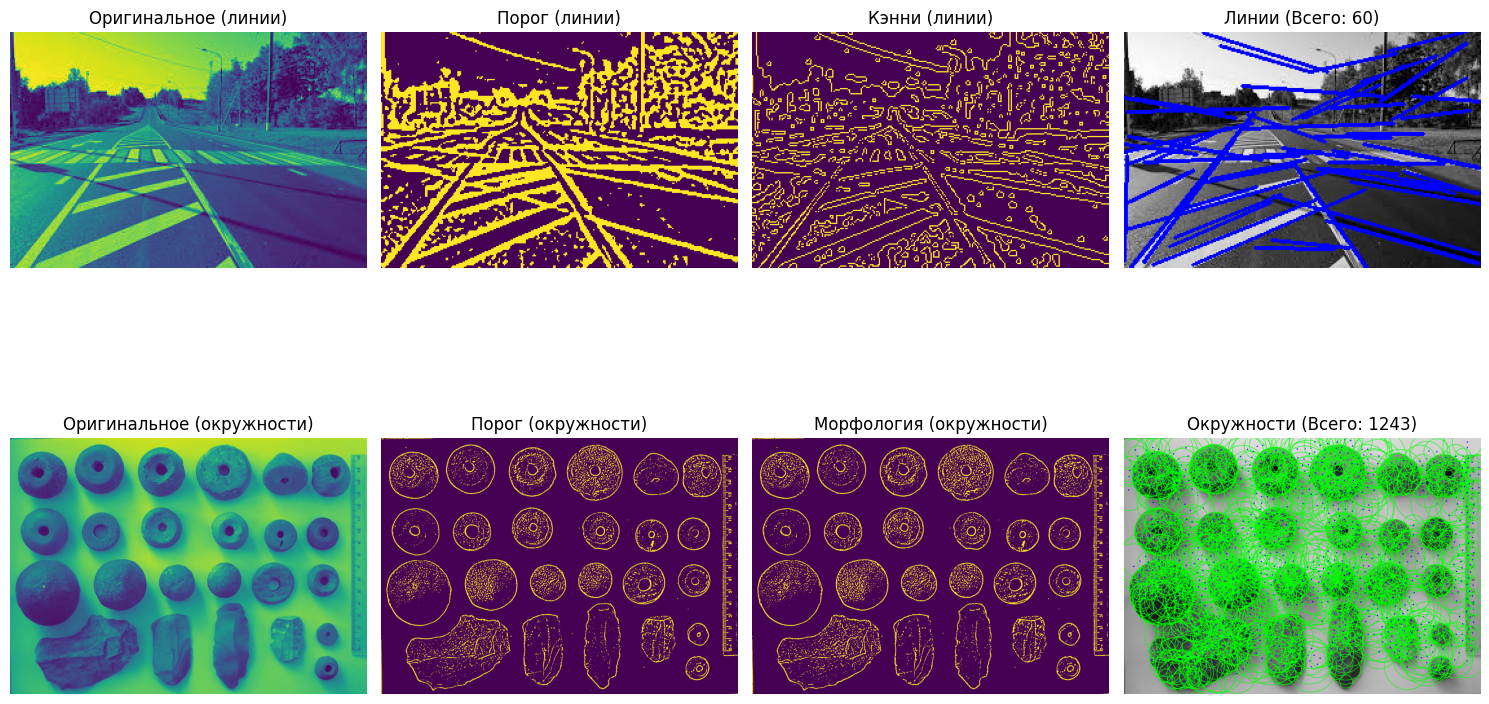

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для отображения изображений
def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, len(images)//2, i + 1)
        plt.title(title)
        plt.imshow(img, cmap=cmap)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# --- Обработка изображения с прямыми линиями ---
lines_image_path = 'direct.jpg' 
lines_image = cv2.imread(lines_image_path, cv2.IMREAD_GRAYSCALE)

# Проверка, загрузилось ли изображение
if lines_image is None:
    print("Ошибка: изображение с линиями не найдено. Проверьте путь к файлу.")
else:
    # Предобработка: размытие
    blurred_lines = cv2.GaussianBlur(lines_image, (5, 5), 0)
    
    # Адаптивная пороговая обработка
    thresh_lines = cv2.adaptiveThreshold(blurred_lines, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 11, 2)
    
    # Морфологическая операция (дилатация) для соединения прерывистых линий
    kernel = np.ones((3, 3), np.uint8)
    morph_lines = cv2.dilate(thresh_lines, kernel, iterations=1)
    
    # Детектор Кэнни с пониженными порогами
    edges_lines = cv2.Canny(morph_lines, 30, 100, apertureSize=3)
    
    # Обнаружение линий с помощью HoughLinesP
    lines = cv2.HoughLinesP(edges_lines, rho=1, theta=np.pi/360, threshold=50, 
                            minLineLength=50, maxLineGap=10)
    
    # Копия изображения для рисования линий
    lines_image_color = cv2.cvtColor(lines_image, cv2.COLOR_GRAY2BGR)
    
    # Рисование линий
    num_lines = 0
    if lines is not None:
        num_lines = len(lines)
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(lines_image_color, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    print(f"Количество найденных линий: {num_lines}")

# --- Обработка изображения с окружностями ---
# Чтение изображения с окружностями
circles_image_path = 'circle.jpg'  # Укажите путь к изображению с окружностями
circles_image = cv2.imread(circles_image_path, cv2.IMREAD_GRAYSCALE)

# Проверка, загрузилось ли изображение
if circles_image is None:
    print("Ошибка: изображение с окружностями не найдено. Проверьте путь к файлу.")
else:
    # Предобработка: размытие
    blurred_circles = cv2.GaussianBlur(circles_image, (9, 9), 2)
    
    # Адаптивная пороговая обработка
    thresh_circles = cv2.adaptiveThreshold(blurred_circles, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY_INV, 11, 2)
    
    # Морфологическая операция (закрытие) для усиления краев окружностей
    kernel = np.ones((3, 3), np.uint8)
    morph_circles = cv2.morphologyEx(thresh_circles, cv2.MORPH_CLOSE, kernel, iterations=1)
    
    # Обнаружение окружностей с помощью HoughCircles
    circles = cv2.HoughCircles(
        morph_circles,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=30,  # Увеличено для разделения близких окружностей
        param1=50,   # Порог Кэнни
        param2=20,   # Понижен для большей чувствительности
        minRadius=5,  # Уменьшен для мелких окружностей
        maxRadius=150  # Увеличен для крупных окружностей
    )
    
    # Копия изображения для рисования окружностей
    circles_image_color = cv2.cvtColor(circles_image, cv2.COLOR_GRAY2BGR)
    
    # Подсчет и рисование окружностей
    num_circles = 0
    if circles is not None:
        circles = np.uint16(np.around(circles))
        num_circles = len(circles[0])
        for i in circles[0, :]:
            # Рисуем окружность
            cv2.circle(circles_image_color, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Рисуем центр окружности
            cv2.circle(circles_image_color, (i[0], i[1]), 2, (0, 0, 255), 3)
    
    print(f"Количество найденных окружностей: {num_circles}")
    
    # Визуализация результатов
    display_images(
        [lines_image, thresh_lines, edges_lines, lines_image_color, 
         circles_image, thresh_circles, morph_circles, circles_image_color],
        ['Оригинальное (линии)', 'Порог (линии)', 'Кэнни (линии)', f'Линии (Всего: {num_lines})',
         'Оригинальное (окружности)', 'Порог (окружности)', 'Морфология (окружности)', f'Окружности (Всего: {num_circles})'],
        cmap='gray' if lines_image_color.shape[-1] == 1 else None
    )

Я отвечу на все ваши вопросы кратко и по существу, чтобы обеспечить ясность и полноту. Ответы будут структурированы для удобства использования в контексте компьютерного зрения с OpenCV.
1. Какие функции осуществляют поиск границ на изображении?
Функции в OpenCV для поиска границ:

cv2.Sobel(): Вычисляет градиенты изображения (по осям X и/или Y) для выделения краев.
cv2.Laplacian(): Применяет оператор Лапласа для обнаружения краев через вторую производную.
cv2.Canny(): Реализует алгоритм Кэнни для поиска границ с подавлением шума и пороговой обработкой.
cv2.Scharr(): Улучшенная версия Собеля для более точного вычисления градиентов.
cv2.Prewitt() (через пользовательские ядра): Используется реже, но тоже выделяет градиенты.
cv2.findContours(): Находит контуры (не совсем края, но границы объектов) на бинарном изображении.

2. На чем основан принцип работы оператора Собеля?
Оператор Собеля основан на вычислении градиента интенсивности изображения, чтобы выделить области с резкими изменениями яркости (края).

Использует два ядра (3x3) для вычисления градиента по осям X и Y:

По X: подчеркивает вертикальные края.
По Y: подчеркивает горизонтальные края.


Формула градиента: $ G = \sqrt{G_x^2 + G_y^2} $, где $ G_x $ и $ G_y $ — градиенты по осям.
Ядра Собеля (пример для $ ksize=3 $):
$$G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}, \quad G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$$

Результат: изображение, где яркость пикселя пропорциональна силе края.

3. На чем основан принцип работы оператора Лапласа?
Оператор Лапласа основан на вычислении второй производной интенсивности изображения для выявления областей с резкими изменениями градиента (края).

Использует ядро Лапласа (обычно 3x3), например:
$$\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$

Формула: $ \nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2} $, где $ I $ — интенсивность пикселя.
Принцип: области, где вторая производная меняет знак (переход через ноль), соответствуют краям.
Результат: изображение, где края выделены как положительные или отрицательные значения.

4. Расскажите алгоритм метода Кэнни.
Алгоритм Кэнни — это многоэтапный процесс для точного обнаружения границ:

Подавление шума: Применяется размытие Гаусса (обычно ядро 5x5) для уменьшения шума.
Вычисление градиента: Используется оператор Собеля для вычисления интенсивности ($ G = \sqrt{G_x^2 + G_y^2} $) и направления градиента.
Немаксимальное подавление: Подавляются пиксели, не являющиеся локальными максимумами градиента в направлении края, чтобы получить тонкие линии.
Двойная пороговая фильтрация:

Пиксели с градиентом выше верхнего порога (threshold2) считаются сильными краями.
Пиксели между нижним (threshold1) и верхним порогами — слабые края.
Пиксели ниже нижнего порога подавляются.


Трассировка связности: Слабые края, соединенные с сильными, сохраняются; остальные отбрасываются.


Результат: бинарное изображение с четкими, тонкими краями.

5. Как параметры в функции cv2.Canny() влияют на конечный результат?
Функция: cv2.Canny(image, threshold1, threshold2, apertureSize=3, L2gradient=False)

threshold1 (нижний порог):

Определяет минимальную интенсивность градиента для слабых краев.
Меньше значение → больше слабых краев → больше деталей, но больше шума.
Пример: threshold1=30 захватывает слабые края, threshold1=100 — только сильные.


threshold2 (верхний порог):

Определяет интенсивность градиента для сильных краев.
Больше значение → меньше краев, но они более четкие.
Пример: threshold2=100 против threshold2=200 снижает количество сильных краев.


apertureSize:

Размер ядра Собеля (по умолчанию 3). Большие значения (5, 7) дают более точные градиенты, но увеличивают вычисления.


L2gradient:

Если True, использует более точную формулу градиента ($ \sqrt{G_x^2 + G_y^2} $).
Если False, использует упрощенную ($ |G_x| + |G_y| $).
Влияет на точность, но эффект минимален.


Влияние: Низкие пороги увеличивают количество краев, но добавляют шум. Высокие пороги дают меньше, но более четкие края.

6. В каком виде возвращает контуры функция cv2.findContours()?
Функция: contours, hierarchy = cv2.findContours(image, mode, method)

contours: Список контуров, где каждый контур — это массив NumPy с формой (N, 1, 2), содержащий координаты точек контура (x, y).

Пример: contours[0] — массив точек первого контура, например, [[[x1, y1]], [[x2, y2]], ...].


hierarchy: Массив с иерархией контуров, форма (1, N, 4), где для каждого контура указаны индексы:

[Next, Previous, First_Child, Parent].
Используется для анализа вложенности контуров (например, внутренние/внешние).


Формат зависит от режима:

cv2.RETR_EXTERNAL: только внешние контуры.
cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE: разные уровни иерархии.



7. Как метод Фримена описывает контур?
Метод Фримена (код цепочки Фримена) описывает контур как последовательность направлений между соседними точками.

Принцип:

Контур представлен как цепочка точек, соединенных в 8-связной сетке (8 возможных направлений: 0–7).
Каждое направление кодируется числом от 0 до 7, где:

0: вправо, 1: вправо-вверх, 2: вверх, 3: влево-вверх, и т.д.


Начинается с начальной точки, и каждое следующее направление записывается как код.


Пример:

Контур: [(0,0), (1,0), (1,1), (0,1)] → цепочка: [0, 1, 3].


В OpenCV: Метод cv2.CHAIN_APPROX_SIMPLE в cv2.findContours() использует упрощенную версию, сохраняя только ключевые точки (например, углы), что похоже на подход Фримена.

8. Чем отличаются результаты работы методов поиска границ (Собеля, Кэнни) и методов поиска контуров?

Методы поиска границ (Собель, Кэнни):

Выход: Изображение (обычно в градациях серого или бинарное для Кэнни).
Собель: Выдает интенсивность градиента (яркость пропорциональна силе края). Не формирует замкнутые контуры, а выделяет области с высокой интенсивностью изменения.
Кэнни: Выдает бинарное изображение с тонкими, четкими краями после подавления шума и пороговой обработки.
Особенность: Фокусируются на локальных изменениях яркости, не обязательно формируют связные объекты.


Методы поиска контуров (cv2.findContours):

Выход: Список массивов координат точек, представляющих границы объектов.
Особенность: Работают с бинарным изображением (например, после Кэнни или порога), выделяя замкнутые или незамкнутые контуры объектов.
Разница:

Границы (Собель, Кэнни): дают пиксельное представление краев, не структурированное как объекты.
Контуры: дают геометрическое описание границ (координаты точек), подходящее для анализа формы, площади и т.д.
Контуры требуют бинарного изображения, тогда как Собель/Кэнни работают с градациями серого.





9. Как с помощью функции cv2.findContours() найти только внешние контуры объектов?
Для поиска только внешних контуров используйте режим cv2.RETR_EXTERNAL:
pythonСвернутьПереносИсполнитьКопироватьcontours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Параметр mode=cv2.RETR_EXTERNAL:

Игнорирует вложенные контуры (например, дыры внутри объектов).
Возвращает только внешние границы объектов.


Пример: На изображении с несколькими монетами найдет только их внешние края, игнорируя внутренние детали.
Другие режимы (для сравнения):

cv2.RETR_LIST: все контуры без иерархии.
cv2.RETR_CCOMP: двухуровневая иерархия (внешние и внутренние).
cv2.RETR_TREE: полная иерархия всех контуров.



10. Расскажите принцип преобразований Хафа.
Преобразование Хафа — метод обнаружения геометрических фигур (линий, окружностей) в изображении через голосование в параметрическом пространстве.

Общий принцип:

Краевые точки (например, из Кэнни) преобразуются в пространство параметров (например, для линий — угол и расстояние).
Каждая точка "голосует" за возможные фигуры, проходящие через нее.
Пиковые значения в параметрическом пространстве соответствуют наиболее вероятным фигурам.


Для линий:

Используется полярная система координат: линия задается параметрами $ \rho $ (расстояние от начала координат) и $ \theta $ (угол наклона).
Формула: $ \rho = x \cos(\theta) + y \sin(\theta) $.
Каждая краевая точка (x, y) голосует за все возможные $ (\rho, \theta) $, формируя синусоиду в пространстве Хафа.
Пиковые значения в аккумуляторе указывают на линии.


Для окружностей:

Параметры: центр (a, b) и радиус r.
Каждая краевая точка голосует за возможные центры окружностей с заданным радиусом.
Требует больше вычислений, так как пространство трехмерное (a, b, r).



11. Что возвращают методы cv2.HoughLines() и cv2.HoughCircles()?

cv2.HoughLines(image, rho, theta, threshold):

Возвращает: Массив NumPy формы (N, 1, 2) с параметрами линий $ (\rho, \theta) $.

$ \rho $: расстояние от начала координат до линии.
$ \theta $: угол наклона линии (в радианах).
Пример: [[[rho1, theta1]], [[rho2, theta2]], ...].


Особенность: Каждая линия — бесконечная, описана в полярных координатах.
Если линий не найдено, возвращается None.


cv2.HoughCircles(image, method, dp, minDist, param1, param2, minRadius, maxRadius):

Возвращает: Массив NumPy формы (1, N, 3) с параметрами окружностей (x, y, r).

x, y: координаты центра окружности.
r: радиус окружности.
Пример: [[[x1, y1, r1], [x2, y2, r2], ...]].


Особенность: Работает с методом cv2.HOUGH_GRADIENT. Возвращает None, если окружности не найдены.
Примечание: Перед использованием требуется размытие (например, GaussianBlur).